In [4]:
% pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

Populating the interactive namespace from numpy and matplotlib


In [5]:
data, sampling_rate = librosa.load('gun.wav')

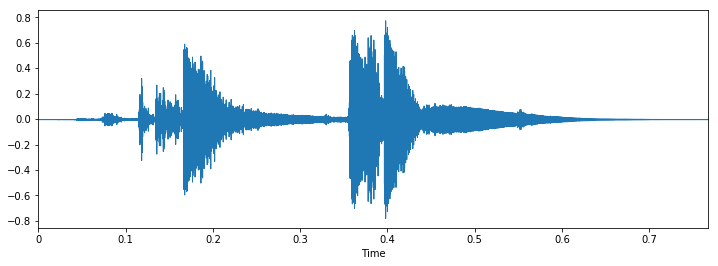

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [7]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

In [8]:
sound_file_paths = ["gun.wav", "bird.wav"]
sound_names = ["gun", "bird"]

In [9]:
raw_sounds = load_sound_files(sound_file_paths)

In [10]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[2].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [87]:
sounds_list = glob.glob("Sound-Data/fold1/*.wav")
sounds_list
directory = os.listdir("Sound-Data/fold1")
features = []
labels = []
directory

['c-0.wav',
 'c1-0.wav',
 'c2-0.wav',
 'c3-0.wav',
 'c4-0.wav',
 'c5-0.wav',
 'c6-0.wav',
 'c7-0.wav',
 'darkwds-2.wav',
 'forest-2.wav',
 'jung-2.wav',
 'jungl-2.wav',
 'jungle-2.wav',
 'night-2.wav',
 'south-2.wav',
 't-1.wav',
 't1-1.wav',
 't2-1.wav',
 't3-1.wav',
 't4-1.wav',
 't5-1.wav',
 't6-1.wav',
 't7-1.wav',
 'tropical-2.wav']

In [88]:
for i in directory:
    X, sample_rate = librosa.load("Sound-Data/fold1/"+i, res_type='kaiser_fast') 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    feature = mfccs
    label = i.split('-')[1].split('.')[0]
    features.append(feature)
    labels.append(label)

In [103]:
features[11]

array([ 5.32181588e+01,  1.79927666e+02, -1.64837864e+02,  8.10377079e+01,
       -1.01223345e+01, -9.34769583e+00,  2.61231797e+01, -4.01286178e+01,
        2.92674567e+01, -5.81505897e+00, -1.44666622e+01,  2.06487956e+01,
       -1.90486221e+01,  7.92123715e+00,  7.42162767e-01, -8.04115747e+00,
        1.08148691e+01, -1.03179513e+01,  4.09727251e+00,  1.24397467e+00,
       -3.86436821e+00,  8.40252516e+00, -5.51460170e+00,  2.58220106e+00,
        6.43605070e-02, -3.78749970e+00,  4.62864850e+00, -5.41680517e+00,
        8.43326935e-02,  4.01691759e-01, -1.25946911e+00,  2.13080185e+00,
       -5.39582481e+00,  1.72096946e+00,  1.18103088e+00, -2.15933751e+00,
        2.03338838e+00, -1.26076645e+00,  2.98409883e+00,  4.94124939e-02])

In [62]:
features[1].shape

(40,)

In [91]:
from sklearn.preprocessing import LabelEncoder
import keras
lb = LabelEncoder()

labels = keras.utils.to_categorical(lb.fit_transform(labels))

In [130]:
features = numpy.array(features)
labels


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [44]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [94]:
num_labels = labels.shape[1]
print(num_labels)
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

3


In [95]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [96]:
model.fit(features, labels, batch_size=2, epochs=500)

Epoch 1/500
24/24 [==============================] - 0s 19ms/step - loss: 9.3184 - acc: 0.2917
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 9.6223 - acc: 0.3750
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 10.1462 - acc: 0.2083
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 5.9975 - acc: 0.5833
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 8.4393 - acc: 0.4583 
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 7.5283 - acc: 0.5000
Epoch 7/500
24/24 [==============================] - 0s 1ms/step - loss: 8.3144 - acc: 0.4583
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 7.8959 - acc: 0.4167
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 9.8432 - acc: 0.3333 
Epoch 10/500
24/24 [==============================] - 0s 1ms/step - loss: 6.9203 - acc: 0.5417
Epoch 11/500
24/24 [==============================] - 0

24/24 [==============================] - 0s 1ms/step - loss: 4.5718 - acc: 0.6667
Epoch 88/500
24/24 [==============================] - 0s 1ms/step - loss: 2.6863 - acc: 0.8333
Epoch 89/500
24/24 [==============================] - 0s 1ms/step - loss: 3.8057 - acc: 0.7500
Epoch 90/500
24/24 [==============================] - 0s 1ms/step - loss: 3.3580 - acc: 0.7917
Epoch 91/500
24/24 [==============================] - 0s 1ms/step - loss: 3.3696 - acc: 0.7917
Epoch 92/500
24/24 [==============================] - 0s 1ms/step - loss: 2.8646 - acc: 0.7917
Epoch 93/500
24/24 [==============================] - 0s 1ms/step - loss: 4.0296 - acc: 0.7500
Epoch 94/500
24/24 [==============================] - 0s 2ms/step - loss: 4.0295 - acc: 0.7500
Epoch 95/500
24/24 [==============================] - 0s 2ms/step - loss: 3.3579 - acc: 0.7917
Epoch 96/500
24/24 [==============================] - 0s 2ms/step - loss: 3.1911 - acc: 0.7917
Epoch 97/500
24/24 [==============================] - 0s 2ms/st

24/24 [==============================] - 0s 1ms/step - loss: 2.9417 - acc: 0.7917
Epoch 173/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 174/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 175/500
24/24 [==============================] - 0s 1ms/step - loss: 2.6869 - acc: 0.8333
Epoch 176/500
24/24 [==============================] - 0s 1ms/step - loss: 2.4909 - acc: 0.8333
Epoch 177/500
24/24 [==============================] - 0s 1ms/step - loss: 3.3579 - acc: 0.7917
Epoch 178/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 179/500
24/24 [==============================] - 0s 2ms/step - loss: 2.6863 - acc: 0.8333
Epoch 180/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 181/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 182/500
24/24 [==============================] -

24/24 [==============================] - 0s 1ms/step - loss: 1.6901 - acc: 0.8750
Epoch 257/500
24/24 [==============================] - 0s 1ms/step - loss: 2.6866 - acc: 0.8333
Epoch 258/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 259/500
24/24 [==============================] - 0s 1ms/step - loss: 3.0835 - acc: 0.7917
Epoch 260/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 261/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 262/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 263/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 264/500
24/24 [==============================] - 0s 2ms/step - loss: 2.6863 - acc: 0.8333
Epoch 265/500
24/24 [==============================] - 0s 2ms/step - loss: 2.6863 - acc: 0.8333
Epoch 266/500
24/24 [==============================] -

24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 342/500
24/24 [==============================] - 0s 2ms/step - loss: 2.5441 - acc: 0.8333
Epoch 343/500
24/24 [==============================] - 0s 1ms/step - loss: 2.5661 - acc: 0.8333
Epoch 344/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 345/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 346/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 347/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 348/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 349/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0162 - acc: 0.8750
Epoch 350/500
24/24 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.000 - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 351/50

24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 427/500
24/24 [==============================] - 0s 1ms/step - loss: 2.6863 - acc: 0.8333
Epoch 428/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 429/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 430/500
24/24 [==============================] - 0s 1ms/step - loss: 2.6863 - acc: 0.8333
Epoch 431/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 432/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 433/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 434/500
24/24 [==============================] - 0s 1ms/step - loss: 2.0148 - acc: 0.8750
Epoch 435/500
24/24 [==============================] - 0s 2ms/step - loss: 2.0148 - acc: 0.8750
Epoch 436/500
24/24 [==============================] -

In [97]:
type(features)

numpy.ndarray

In [135]:
X, sample_rate = librosa.load("Sound-Data/fold1/c7-0.wav", res_type='kaiser_fast') 
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 

In [136]:
mfccs = np.array(mfccs)
mfccs = mfccs.reshape((1, 40))
mfccs.shape

(1, 40)

In [137]:
model.predict(mfccs)

array([[1., 0., 0.]], dtype=float32)

In [138]:
classes = ["saw", "vehicle", "noise"]

In [139]:
index = argmax(model.predict(mfccs))
index

0

In [140]:
print("Detected: "+classes[index])

Detected: saw
